<bound method DataFrame.info of                                                   email  label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1     martin a posted tassos papadopoulos the greek ...      0
2     man threatens explosion in moscow thursday aug...      0
3     klez the virus that won t die already the most...      0
4      in adding cream to spaghetti carbonara which ...      0
...                                                 ...    ...
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1

[3000 rows x 2 columns]>
Number of null values in the 'email' column: 1
Accuracy Score: 0.9583333333333334
Classes are [0 1]


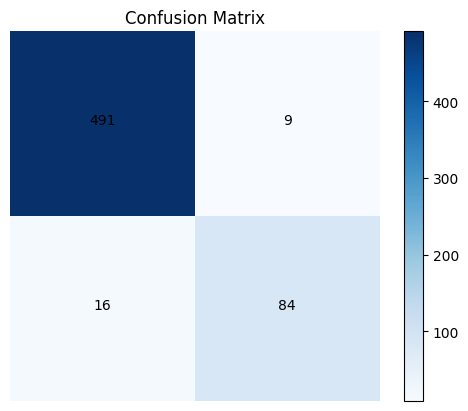

Confusion Matrix:
 [[491   9]
 [ 16  84]]


In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset
df = pd.read_csv('/content/dataset_NB.csv')

# Printing the information regarding the data read above
print(df.info)

# Preprocessing the data which is read by using pandas
# Count the number of null values in the 'email' column
null_count = df['email'].isnull().sum()
print("Number of null values in the 'email' column:", null_count)

# Removing rows with missing or null values in the 'email' column as its only 1
df = df.dropna(subset=['email'])
X = df['email']
y = df['label']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating the Gaussian Naive Bayes model
model = GaussianNB()

# Converting the sparse matrix to a dense numpy array
X_train_dense = X_train.toarray()

# Fitting the model to the training data
model.fit(X_train_dense, y_train)

# Predicting on the test data
y_pred = model.predict(X_test.toarray())

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Getting the unique classes from the target variable
classes = np.unique(y_test)
print("Classes are",classes)

# Plotting the confusion matrix
plt.figure()
plt.imshow(confusion_mat, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Adding tick labels
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(classes)), classes)

# Adding color bars
plt.colorbar()

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, confusion_mat[i, j],
                 horizontalalignment="center",
                 color="black" if confusion_mat[i, j] > 0 else "black")

# Turning off axis
plt.axis('off')
plt.show()

# Reporting the confusion matrix
print("Confusion Matrix:\n", np.matrix(confusion_mat))

**Dataset Preprocessing:**

We imported the dataset using Pandas to view its structure.  We checked the "email" column for null values and found it had a negligible number.  We removed rows with null values in the "email" column. Since "email" contains text, we converted it into numerical features using CountVectorizer. This converted the text into a matrix that counts the occurrences of words.

**Model Training and Evaluation:**

We use the Gaussian Naive Bayes classifier for its ability to efficiently handle text data. The dataset is divided into sets for practice (training) and assessment (testing). Training takes place with the training set; predictions are then made with the testing set. The accuracy score measures the model's effectiveness. We also create a confusion matrix to evaluate how well the model categorizes different types of text.

**Visualization:**

To evaluate the classifier's accuracy, a visual representation called a confusion matrix is plotted using Matplotlib. The matrix displays the model's true positives, false positives, true negatives, and false negatives. Each box in the matrix shows the number of cases where the actual class (rows) and forecast class (columns) coincide. The strength of the count is shown by the color's intensity. The axes labels clarify which class is represented in each row and column.


**Output Explanation:**

The confusion matrix displays the following:

True Positives (TP): 491

False Positives (FP): 9

False Negatives (FN): 16

True Negatives (TN): 84

These measurements evaluate how well the model can differentiate between the two categories. Diagonal elements show correct predictions, while off-diagonal elements indicate mistakes. The model performed well in this specific result. It had a high number of true positives and true negatives, but few false positives and false negatives. This led to a high accuracy score of approximately 95.83%.

In [2]:
!pip install scikit-learn

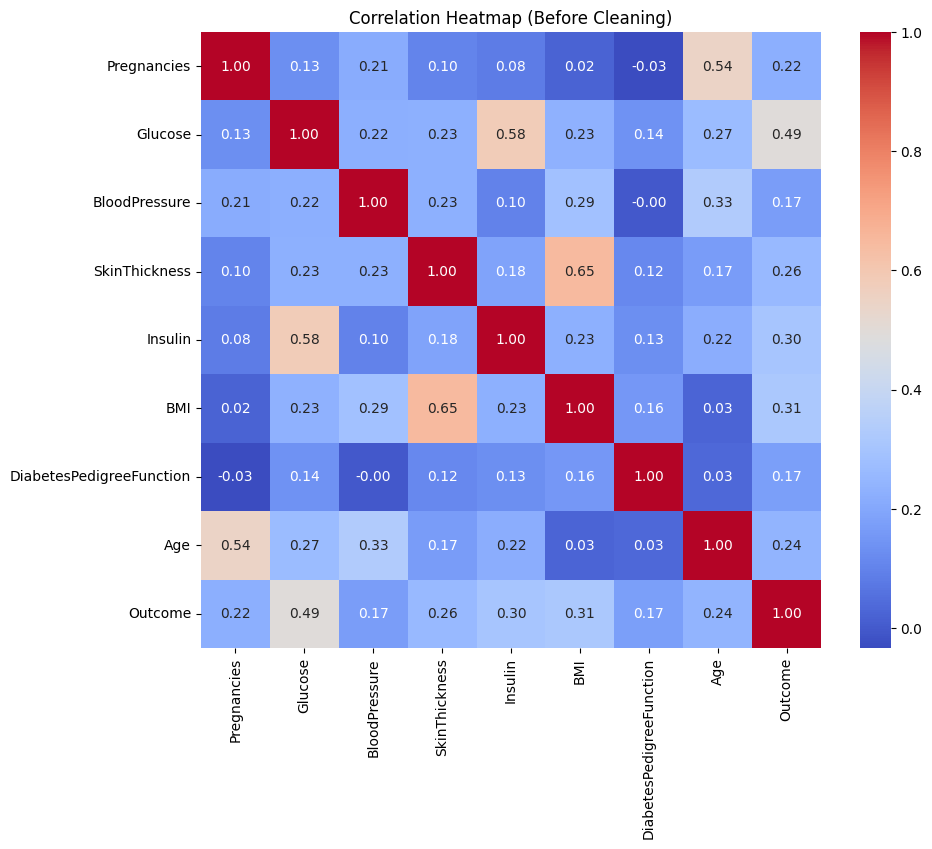

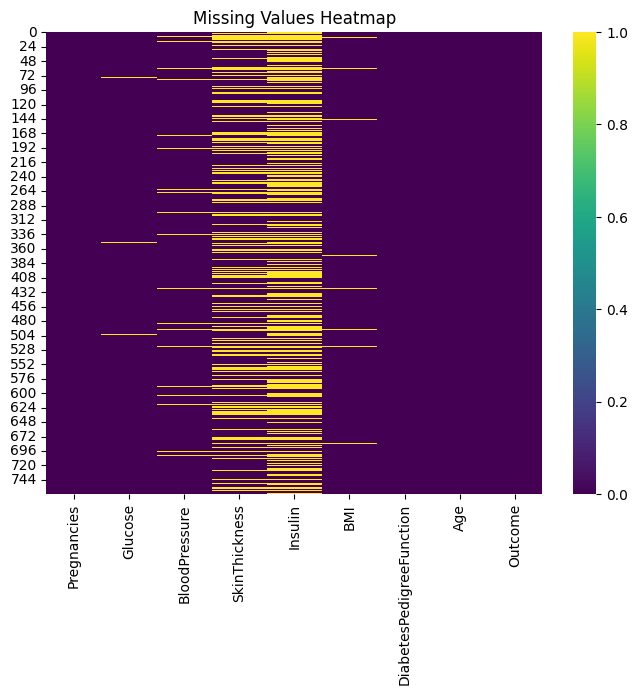

Columns with missing values: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Missing values after imputation: 0

 Before removing duplicates, shape of the dataset: (768, 9)
Duplicate Rows:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

After removing duplicates, new shape of the dataset: (768, 9)


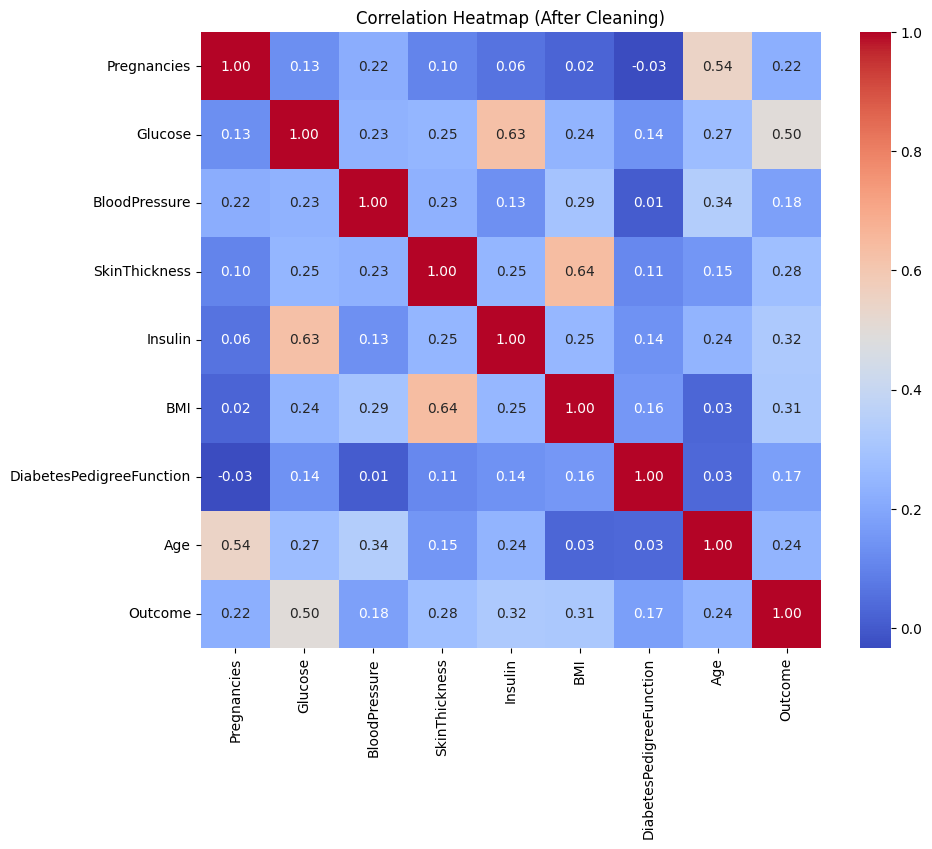

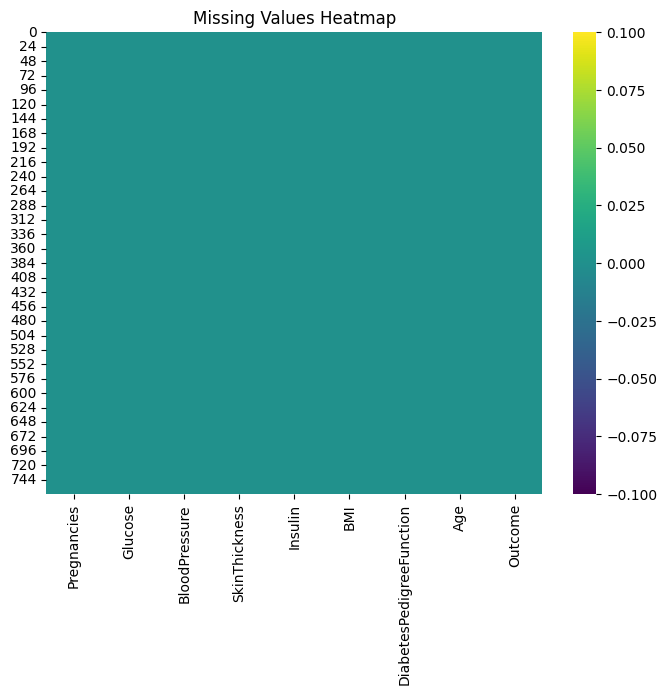

After Scaling
After splitting


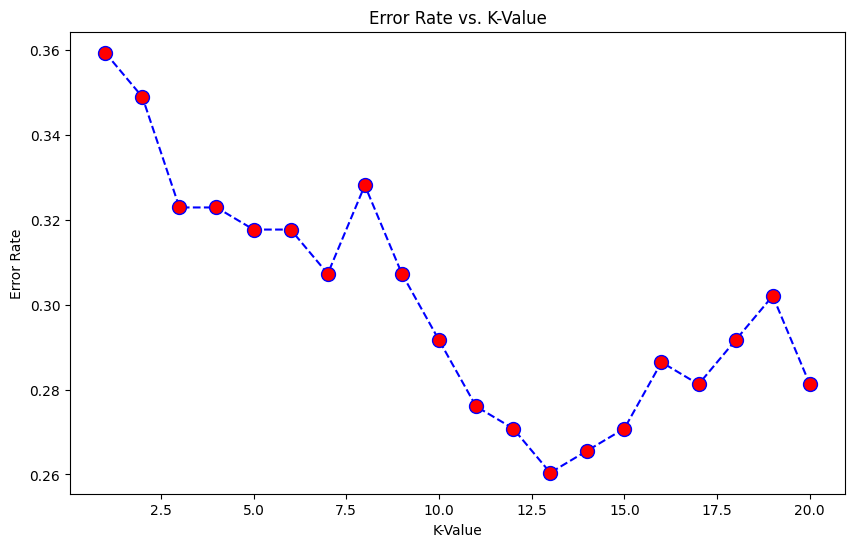

The best k value is  13
Three best attributes: Index(['Glucose', 'BMI', 'Insulin'], dtype='object')
Accuracy for k=12: 0.7291666666666666
Accuracy for k=13: 0.7395833333333334
Accuracy for k=14: 0.734375


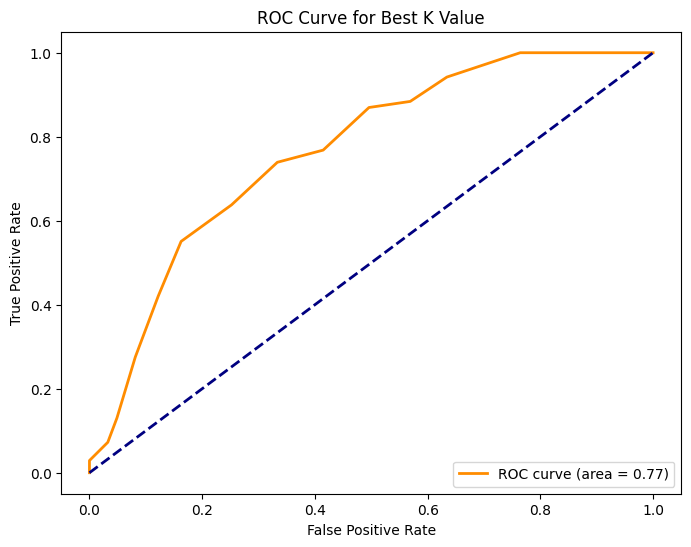

Confusion Matrix for k=12:
[[102  21]
 [ 31  38]]

Classification Report for k=12:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       123
           1       0.64      0.55      0.59        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192

Accuracy for k=12: 0.7291666666666666
Confusion Matrix for k=13:
[[99 24]
 [26 43]]

Classification Report for k=13:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.62      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192

Accuracy for k=13: 0.7395833333333334
Confusion Matrix for k=14:
[[103  20]
 [ 31  38]]

Classification Report for k=14:
              precision  

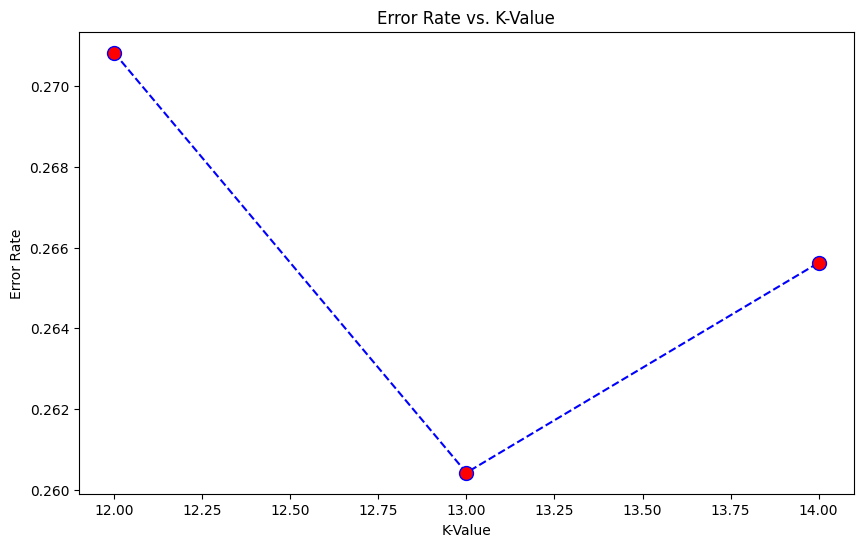

Next three attributes with highest correlations: ['SkinThickness', 'Age', 'Pregnancies']


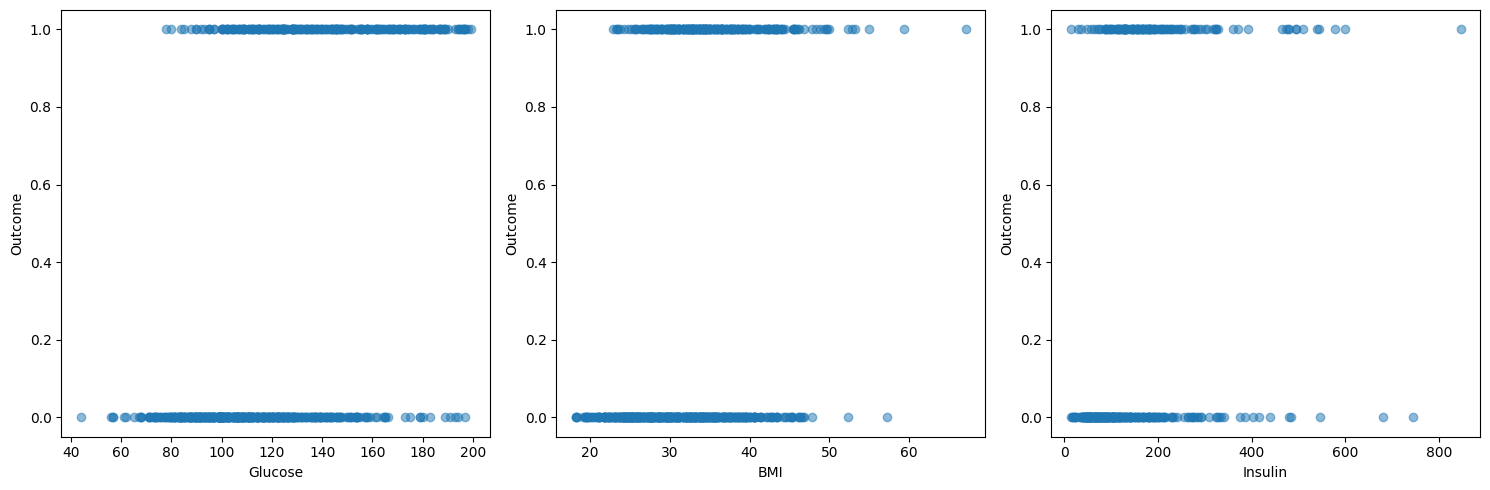

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Step 1 --> Reading the dataset
data = pd.read_csv("/content/dataset_KNN.csv")

# Step 3 a --> Constructing the Correlation matrix before Preprocessing
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Before Cleaning)')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Step 2 --> Pre-processing the data
# Checking for missing values in all columns
missing_values = data.isnull().sum()
# Printing columns with missing values
columns_with_missing = missing_values[missing_values > 0].index.tolist()
print("Columns with missing values:", columns_with_missing)
imputer = KNNImputer()
imputed_data = imputer.fit_transform(data)
data_imputed = pd.DataFrame(imputed_data, columns=data.columns)

# Checking if there are any missing values remaining
print("Missing values after imputation:", data_imputed.isnull().sum().sum())
print("\n Before removing duplicates, shape of the dataset:", data.shape)
# Checking for duplicates in the dataset
duplicates = data[data.duplicated()]

# Displaying the duplicates
print("Duplicate Rows:")
print(duplicates)

# Removing duplicates
data = data.drop_duplicates()

# Confirm duplicates have been removed
print("\nAfter removing duplicates, new shape of the dataset:", data.shape)


# Step 3 b-->  Constructing the Correlation matrix after Preprocessing
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (After Cleaning)')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(data_imputed.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Step 4 --> Scaling the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed.drop('Outcome', axis=1))

# Creating a DataFrame of scaled features
scaled_data = pd.DataFrame(scaled_features, columns=data_imputed.columns[:-1])
print("After Scaling")


# Step 5 --> Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Outcome'], test_size=0.25, random_state=42)
print("After splitting")

# Finding the best k value
error_rate = []

# Testing K values from 1 to 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting error rate vs. K-value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

best_k = error_rate.index(min(error_rate)) + 1
print("The best k value is ",best_k)
# Step 7 --> Initializing the KNN classifier with the best K value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fitting the classifier on the training data
knn.fit(X_train, y_train)

# Step 8 --> Selecting 3 best attributes
correlation_with_outcome = abs(data.corr()['Outcome']).sort_values(ascending=False)
three_best_attributes = correlation_with_outcome.index[1:4]
print("Three best attributes:", three_best_attributes)


# Step 9 --> Testing the classifier wuth best_k_neighnor values
k_values = [best_k - 1, best_k, best_k + 1]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

# Step 10 --> Plotting the ROC curve for best K value.
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best K Value')
plt.legend(loc="lower right")
plt.show()


# Step 12 a --> Calculating and printing the confusion matrix, and the classification Report (includes: precision,
# recall,f1-score, and support) for k values and its neighbors.

conf_matrices = []
classification_reports = []
accuracies = []

# Iterating over different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    classification_reports.append(classification_report(y_test, y_pred))

# Printing confusion matrices, accuracies, and classification reports
for i, k in enumerate(k_values):
    print(f"Confusion Matrix for k={k}:")
    print(conf_matrices[i])
    print(f"\nClassification Report for k={k}:")
    print(classification_reports[i])
    print(f"Accuracy for k={k}: {accuracies[i]}")

# Step 12 b: Plotting the Error rate vs. K-value for the three different K values
error_rate2=[]

for i in range(best_k-1, best_k+2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate2.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10, 6))
plt.plot(range(best_k-1,best_k+2), error_rate2, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

# Identifying attributes with highest correlations
top_attributes = correlation_with_outcome.index[1:4]  # Already selected three attributes

# Excluding top attributes
remaining_attributes = data.drop(columns=['Outcome']).columns.difference(top_attributes)

# Selecting next three attributes with highest correlations
next_three_attributes = data[remaining_attributes].corrwith(data['Outcome']).abs().nlargest(3).index.tolist()

print("Next three attributes with highest correlations:", next_three_attributes)

# Selecting the three most significant attributes
three_best_attributes = correlation_with_outcome.index[1:4]

# Step 13 b ---> Plotting each attribute against the target variable in a separate subplot
plt.figure(figsize=(15, 5))

for i, attribute in enumerate(three_best_attributes, 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[attribute], data['Outcome'], alpha=0.5)
    plt.xlabel(attribute)
    plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

**Step 13 --> Reasoning Questions**

**A. Describe the Nearest Neighbors method and why scaling is important in KNN**

KNN (k-nearest neighbor) is an effective learning algorithm for classification and regression. In KNN, an object's class is determined by the class of its most similar neighbors.Scaling is essential in KNN because it uses distances to compare data. If features have different scales, those with larger ranges can influence distance calculations more than others. By scaling the features, we give them equal importance in determining distances. This makes KNN more accurate and reliable.

**B. Explain what your criteria was for selecting the three attributes. What other 3 attribute can you choose? Visualizations of the target variable with three most significant attributes in a 2D projection, and write your observations in 4 - 5 lines**

To choose the three most important features, we looked at how well each feature correlated with the desired outcome. Features with larger absolute correlation coefficients were considered the most significant. Depending on their correlation with the target variable, three additional features could be chosen. The other three attributes would be SkinThickness, Age and Pregnancies
A 2D projection of the target variable with the three most significant features helps us understand how they are linked. This visualization may reveal noticeable patterns or category separations based on these characteristics.

**C. Explain Pearson's Correlation Coefficient, write the observations from heatmaps drawn**

Pearson's Correlation Coefficient measures how strongly two continuous variables are related in a straight line. It ranges from -1 to 1. A value of 1 means they are perfectly related positively, meaning as one variable increases, the other also increases. A value of -1 means they are perfectly related negatively, meaning as one variable increases, the other decreases. A value of 0 means there is no straight-line relationship between the variables. Heatmaps are used to visualize the correlation matrix, which shows the strength and direction of correlations between every pair of variables in a dataset. This can help identify variables that are very similar or have a strong influence on the dataset.

**D. Interpret and compare the results**

The results obtained from the KNN classifier, such as accuracy, confusion matrices, and classification reports,provide insights into the performance of the model with different values of K. The best K value is 13 with highest accuracy of 0.7395833333333334. By analyzing these results, we can determine the optimal value of K that yields the highest accuracy and best trade-off between bias and variance. Additionally, comparing the results obtained with different K values helps in understanding the sensitivity of the model to changes in the number of neighbors considered.




